In [1]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

(512, 512)


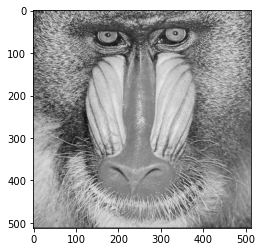

In [2]:
# reading baboon.png image
img = cv2.imread('baboon.png')
# converting to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img,cmap='gray')
print(img.shape)

In [3]:
# function to find correlation
def correlation(img,filter1,m1,m2):
    temp = np.zeros([img.shape[0]+2*(filter1.shape[0]-1),img.shape[1]+2*(filter1.shape[1]-1)])
#     print(temp.shape,img.shape,filter1.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            temp[i+filter1.shape[0]-1][j+filter1.shape[1]-1]=img[i][j]
    cor=np.zeros([img.shape[0]+filter1.shape[0]-1,img.shape[1]+filter1.shape[1]-1])

    for i in range(img.shape[0]+filter1.shape[0]-1):
        for j in range(img.shape[1]+filter1.shape[1]-1):
            cor[i][j]=np.sum(np.multiply(temp[i:(i+filter1.shape[0]),j:(j+filter1.shape[1])]-m1,filter1-m2))
            
    return cor
    

10665700.833333332


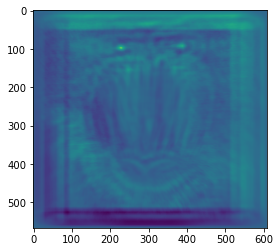

In [4]:
# reading eye.png(left eye) i.e. image provided in the mail
eye1 = cv2.imread('eye.png')
# converting eye.png to grayscale
eye1 = cv2.cvtColor(eye1,cv2.COLOR_BGR2GRAY)

blank1 = np.zeros([eye1.shape[0],eye1.shape[1]], dtype=np.uint8)
meanImg = np.mean(img)
meanEye1 = np.mean(eye1)
# print(meanImg)
test1 = correlation(img,eye1,meanImg,meanEye1)
# test = test[:,:]
print(np.max(test1))
plt.imshow(test1)

In [5]:
max1 = np.max(test1)
loc1=np.where(test1==max1)
print(f"location of left eye is at ({loc1[0][0]},{loc1[1][0]})")

location of left eye is at (98,229)


12343751.555537138


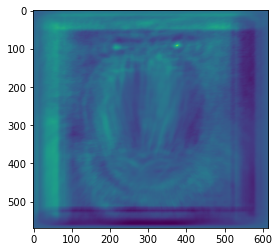

In [6]:
# reading eye2.png(right eye) i.e. right eye cropped from baboon.png
eye2 = cv2.imread('eye2.png')
# converting eye2.png to grayscale
eye2 = cv2.cvtColor(eye2,cv2.COLOR_BGR2GRAY)

blank2 = np.zeros([eye2.shape[0],eye2.shape[1]], dtype=np.uint8)
meanImg = np.mean(img)
meanEye2 = np.mean(eye2)

test2 = correlation(img,eye2,meanImg,meanEye2)
print(np.max(test2))
plt.imshow(test2)

In [7]:
max2 = np.max(test2)
loc2=np.where(test2==max2)
print(f"location of right eye is at ({loc2[0][0]},{loc2[1][0]})")

location of right eye is at (92,375)
